In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io

In [2]:
%matplotlib inline

In [3]:
cd C:\Users\诚明\Desktop\MachineLearning\jiqixuexikecheng\PS1-data\q2\data

C:\Users\诚明\Desktop\MachineLearning\jiqixuexikecheng\PS1-data\q2\data


# Locally Weighted Logistic Regression (a non-parametric method)

In [4]:
X=pd.read_csv('x.dat',header=None,delim_whitespace=True)
y=pd.read_csv('y.dat',header=None,delim_whitespace=True)

In [5]:
X=np.array(X)
y=np.array(y)
m=X.shape[0]

In [6]:
X=np.insert(X,0,1,axis=1)
n=X.shape[1]

In [18]:
neg=X[np.where(y==0)[0],1:]
pos=X[np.where(y==1)[0],1:]

In [19]:
def plotData():
    plt.figure(figsize=(10,6))
    plt.plot(neg[:,0],neg[:,1],'bx',label='neg 0')
    plt.plot(pos[:,0],pos[:,1],'ro',label='pos 1')
    plt.grid(linestyle='-.',alpha=0.3)
    plt.legend()

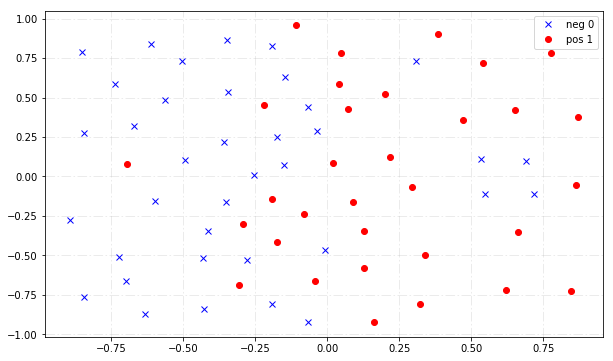

In [20]:
plotData()

### 1. Compute weights for each training example

In [10]:
def sigmoid(theta,x):
    return 1/(1+np.exp(-x.dot(theta)))

def getWeights(x_train,x,tau):
    w=[]
    for i in range(m):
        xt=x_train[i,1:].reshape((n-1,1))
        mod=np.sum([(x-xt)[j]**2 for j in range(n-1)])
        w.append(np.exp(mod/(-2*tau)))
    return np.array(w)

### 2. Maximize log-likelihood function using Newton's Method

### 3. Output y=h(x) as the prediction

In [11]:
def lwlr(x_train,y_train,x,tau,lam=0.0001,iterations=20):
    w=getWeights(x_train,x,tau).reshape((m,1))  # Everytime when predicting new inputs, we have to compute new weights for optimizing theta
    theta=np.zeros((n,1))                       # We will use the whole training set for prediction, not some fixed parameters.
    for _ in range(iterations):
        h=sigmoid(theta,x_train)
        gradient=x_train.T.dot((y-h)*w)-lam*theta
        H=-x_train.T.dot(w*h*(1-h)*x_train)-lam*np.eye(n)
        theta=theta-np.linalg.inv(H).dot(gradient)
    x=np.insert(x,0,1,axis=0).reshape((1,3))
    if sigmoid(theta,x)>0.5:
        return 1
    else:
        return 0

In [12]:
x=np.array([[0.5],[-0.5]])

In [13]:
lwlr(X,y,x,tau=1)

1

### 4. Plot the resulting classifier over a large grid of points

In [45]:
def plot_lwlr(X,y,tau,res):
    i=np.linspace(-1,1,res)
    j=np.linspace(-1,1,res)
    x=np.zeros((2,1))
    pred=np.zeros((res,res))
    for a in range(i.size):
        #if a%15==0:
                #print(a)             # help us track the program
        for b in range(j.size):
            x[0],x[1]=i[a],j[b]       
            pred[b,a]=lwlr(X,y,x,tau)
    plt.imshow(pred,extent=(-1,1,-1,1),cmap=plt.cm.RdBu_r)       # Display the image in an array to current axes.

In [56]:
def plot_full(tau,res):
    plot_lwlr(X,y,tau,res)
    plt.plot(neg[:,0],neg[:,1],'bx',label='neg 0',markersize=8,markeredgewidth=5)
    plt.plot(pos[:,0],pos[:,1],'ro',label='pos 1',markersize=8)
    plt.grid(linestyle='-.',alpha=0.3)
    plt.title('Tau=%s' % tau,fontsize=14)
    plt.legend()

### 5. Evaluate the system with a variety of different bandwidth parameters tau

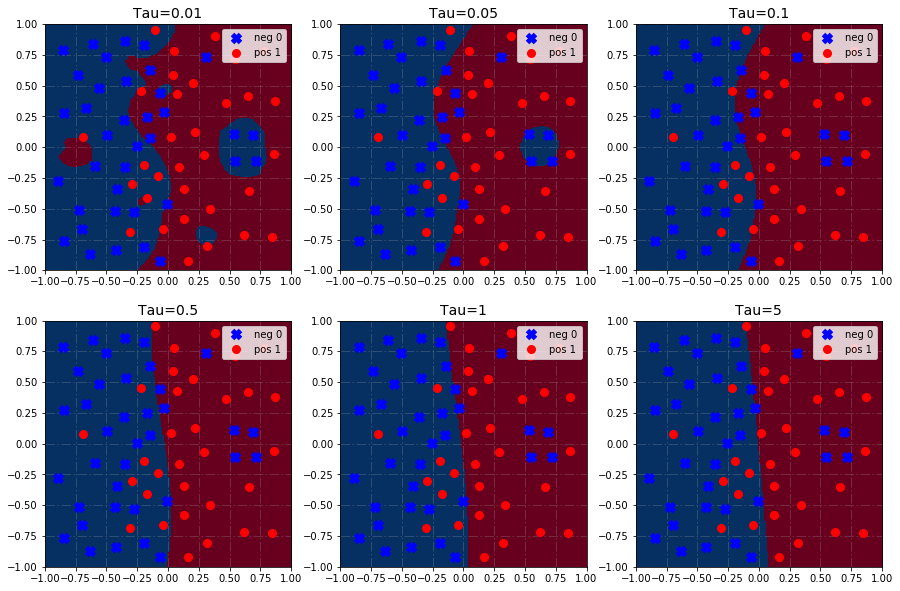

In [58]:
# For smaller tau, the classifier appears to overfit the data set, obtaining zero training error,
# but outputting a sporadic looking decision boundary. As tau grows, the resulting deci-
# sion boundary becomes smoother, eventually converging (in the limit as tau → ∞ to the
# unweighted linear regression solution).

plt.figure(figsize=((15,10)))
plt.subplot(231)
plot_full(0.01,200)

plt.subplot(232)
plot_full(0.05,200)

plt.subplot(233)
plot_full(0.1,200)

plt.subplot(234)
plot_full(0.5,200)

plt.subplot(235)
plot_full(1,200)

plt.subplot(236)
plot_full(5,200)